### Analyze the HDF file contents ###

In [1]:
from pyhdf.SD import SD, SDC

#### View the datasets available ####

In [2]:
FILE_NAME = "../project/data/h17v07/MOD44B.A2000065.h17v07.061.2022273165232.hdf"
hdf_file = SD(FILE_NAME, SDC.READ)

# View all datasets (optional)
print("Available datasets:", hdf_file.datasets())
print("Keys=", hdf_file.datasets().keys())

Available datasets: {'Percent_Tree_Cover': (('YDim:MOD44B_250m_GRID', 'XDim:MOD44B_250m_GRID'), (4800, 4800), 21, 0), 'Percent_NonTree_Vegetation': (('YDim:MOD44B_250m_GRID', 'XDim:MOD44B_250m_GRID'), (4800, 4800), 21, 1), 'Percent_NonVegetated': (('YDim:MOD44B_250m_GRID', 'XDim:MOD44B_250m_GRID'), (4800, 4800), 21, 2), 'Quality': (('YDim:MOD44B_250m_GRID', 'XDim:MOD44B_250m_GRID'), (4800, 4800), 21, 3), 'Percent_Tree_Cover_SD': (('YDim:MOD44B_250m_GRID', 'XDim:MOD44B_250m_GRID'), (4800, 4800), 23, 4), 'Percent_NonVegetated_SD': (('YDim:MOD44B_250m_GRID', 'XDim:MOD44B_250m_GRID'), (4800, 4800), 23, 5), 'Cloud': (('YDim:MOD44B_250m_GRID', 'XDim:MOD44B_250m_GRID'), (4800, 4800), 21, 6)}
Keys= dict_keys(['Percent_Tree_Cover', 'Percent_NonTree_Vegetation', 'Percent_NonVegetated', 'Quality', 'Percent_Tree_Cover_SD', 'Percent_NonVegetated_SD', 'Cloud'])


#### Analyze a single dataset ####

In [3]:
sds_name = 'Percent_Tree_Cover'
sds_obj = hdf_file.select(sds_name)

In [4]:
dimensions = sds_obj.dimensions()
dimensions

{'YDim:MOD44B_250m_GRID': 4800, 'XDim:MOD44B_250m_GRID': 4800}

In [5]:
attributes = sds_obj.attributes()
attributes

{'long_name': 'Percent Tree Cover',
 'units': 'Percent Fractional Cover',
 'valid_range': [0, 100],
 '_FillValue': 253,
 'Water_Value': 200}

In [6]:
data = sds_obj.get()
print(data.shape)
data

(4800, 4800)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [21, 21, 10, ...,  4,  5,  4],
       [22, 14, 11, ...,  5,  6,  5],
       [21, 21, 21, ...,  5,  5,  6]], dtype=uint8)

In [7]:
hdf_file.end()

### Use custom dataloader ###

In [8]:
from MoD44BLoader import MoD44BLoader

In [9]:
loader = MoD44BLoader("../project/data/h17v07/", "Percent_Tree_Cover")
data = loader.get_time_series()
print(data.shape)

(20, 4800, 4800)


In [10]:
pixel_ts_data = loader.get_pixel_time_series(4225, 34)
pixel_ts_data

array([11, 21, 16, 15, 16, 15, 19, 15, 29, 12, 14, 18,  9, 16, 29, 14, 27,
       13, 24, 22], dtype=int16)

#### Forecast on pixel time series data ####

In [11]:
from AdaptiveAutoRegForecaster import AdaptiveAutoRegForecaster

In [12]:
forecaster = AdaptiveAutoRegForecaster()

In [13]:
training_size = 0.75
train_start = int(0)
train_end = int(training_size * len(pixel_ts_data))
print(train_start, train_end)

0 15


In [14]:
forecaster.fit(pixel_ts_data, (train_start, train_end))

In [15]:
actual = pixel_ts_data[train_end:]
actual

array([14, 27, 13, 24, 22], dtype=int16)

In [16]:
pred_diff = forecaster.forecast(steps=len(actual))
predicted = forecaster.invert_difference(pred_diff, last_observed_value=pixel_ts_data[train_end-1])
predicted

array([20.26150873, 23.33985078,  0.76625366, 13.15042008, 26.04375077])

In [17]:
predicted.shape

(5,)

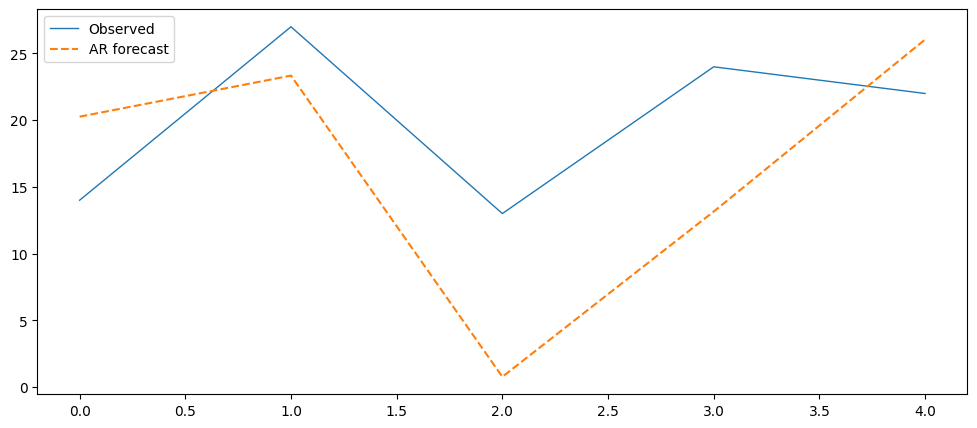

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(actual, label="Observed", linewidth=1)
plt.plot(predicted, label="AR forecast", linestyle="--")
plt.legend()
plt.show()

Forest cover visualization functions loaded!
Use these functions to create heatmaps and time series plots.

Creating heatmaps for different years...


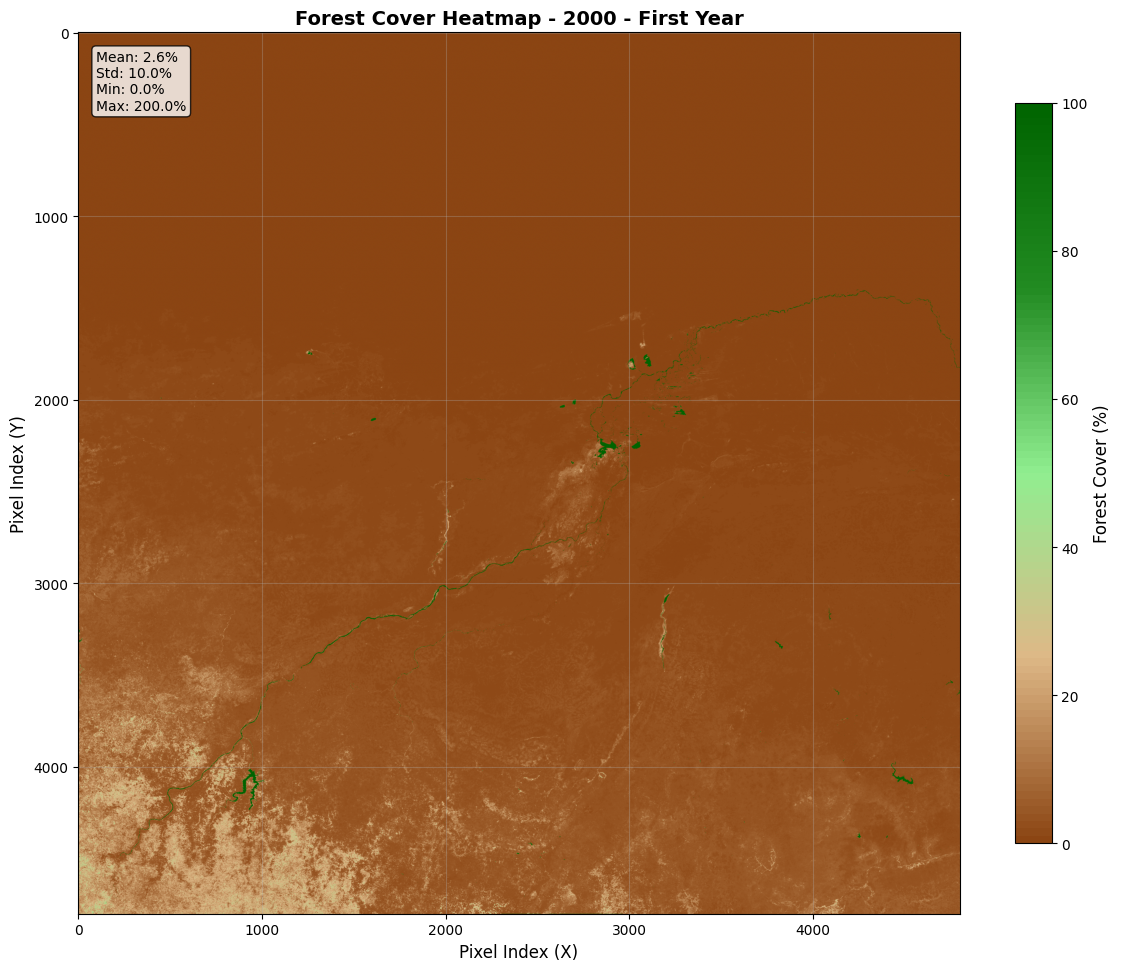

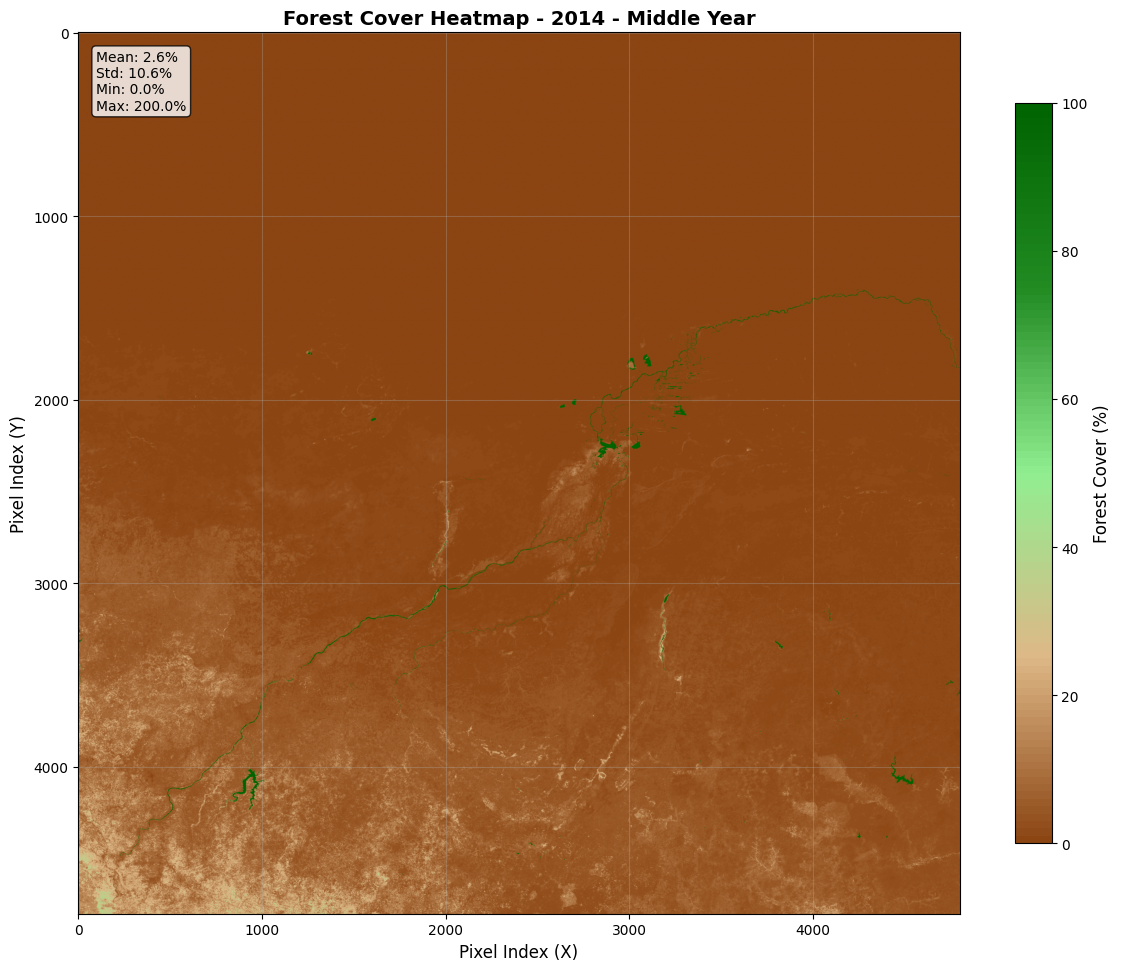

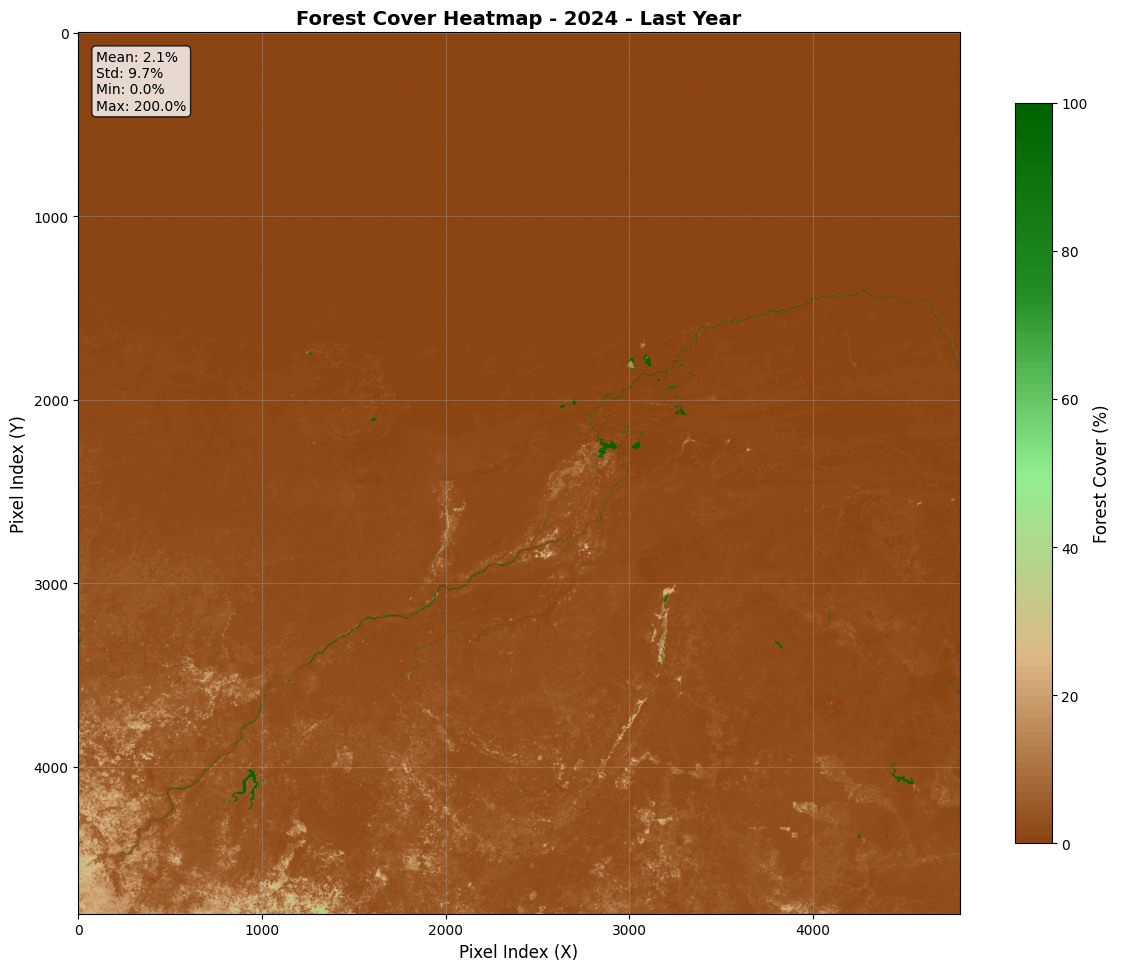


Creating change maps between years...


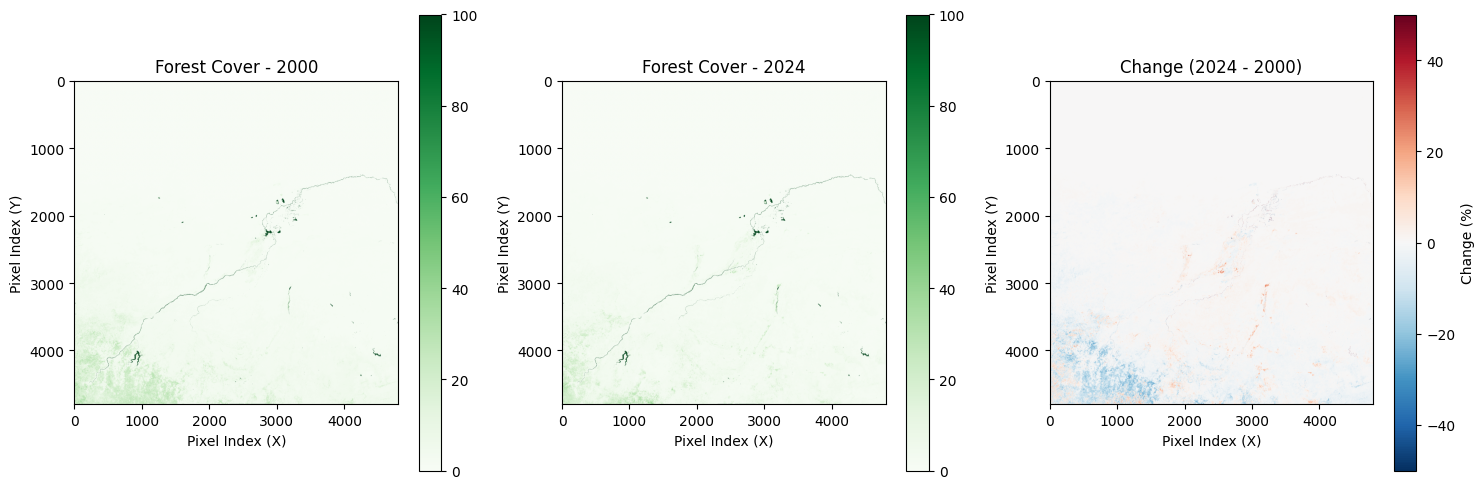

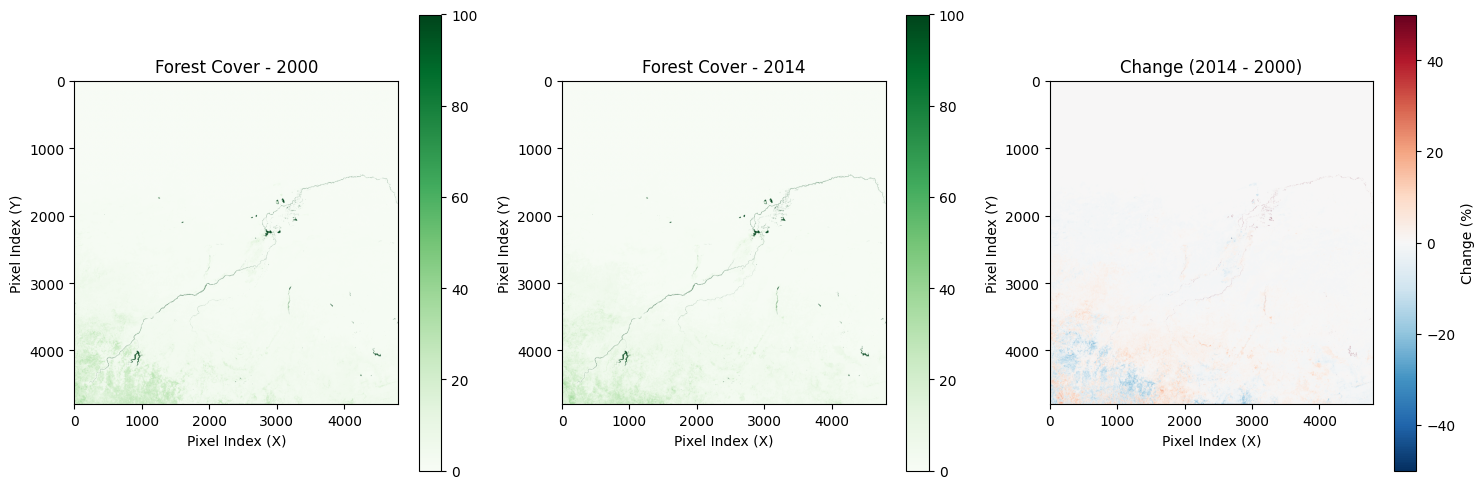


Creating forecast visualization...


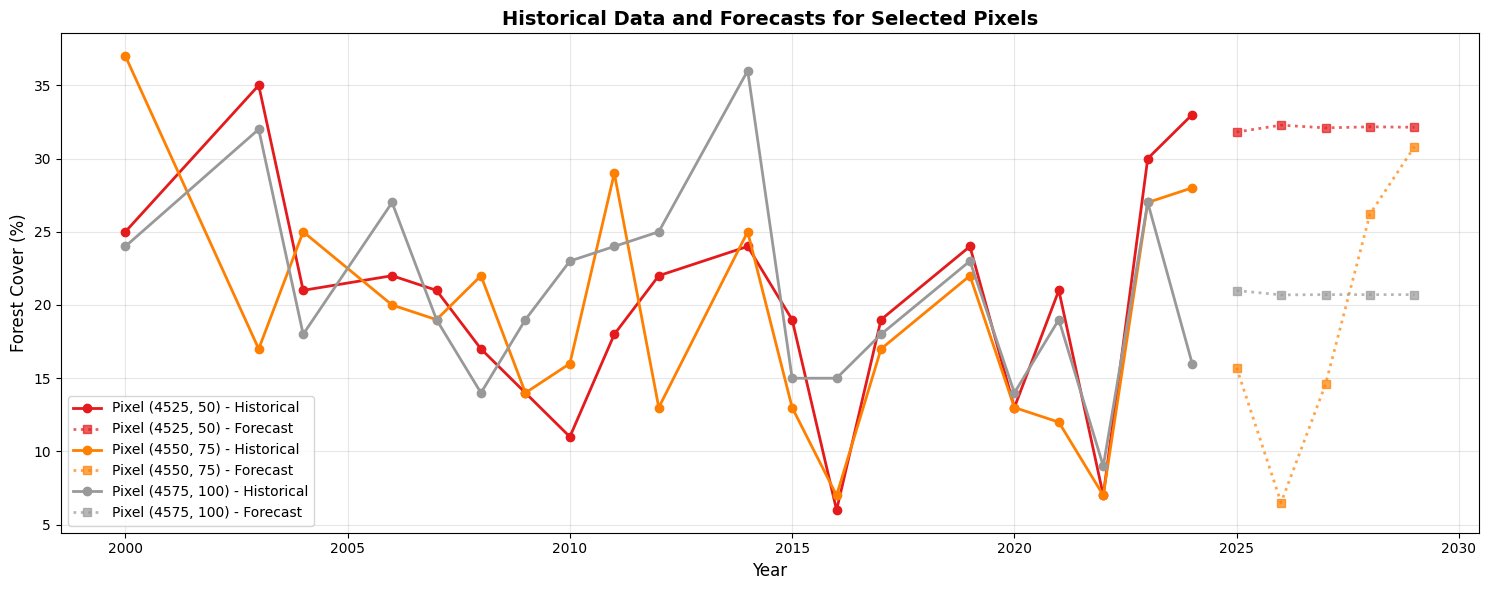


5. Summary statistics...
Forest Cover Statistics by Year:
2000: Mean=2.6%, Std=10.0%, Min=0.0%, Max=200.0%
2003: Mean=2.3%, Std=10.4%, Min=0.0%, Max=200.0%
2004: Mean=2.6%, Std=10.7%, Min=0.0%, Max=200.0%
2006: Mean=2.5%, Std=11.3%, Min=0.0%, Max=253.0%
2007: Mean=2.3%, Std=10.4%, Min=0.0%, Max=200.0%
2008: Mean=2.7%, Std=10.6%, Min=0.0%, Max=253.0%
2009: Mean=3.0%, Std=10.9%, Min=0.0%, Max=200.0%
2010: Mean=2.1%, Std=10.4%, Min=0.0%, Max=200.0%
2011: Mean=1.9%, Std=10.5%, Min=0.0%, Max=200.0%
2012: Mean=2.5%, Std=10.6%, Min=0.0%, Max=200.0%
2014: Mean=2.6%, Std=10.6%, Min=0.0%, Max=200.0%
2015: Mean=2.4%, Std=10.6%, Min=0.0%, Max=200.0%
2016: Mean=1.7%, Std=10.1%, Min=0.0%, Max=253.0%
2017: Mean=2.1%, Std=10.3%, Min=0.0%, Max=200.0%
2019: Mean=2.5%, Std=10.7%, Min=0.0%, Max=200.0%
2020: Mean=2.1%, Std=10.3%, Min=0.0%, Max=200.0%
2021: Mean=1.9%, Std=9.6%, Min=0.0%, Max=200.0%
2022: Mean=2.1%, Std=9.5%, Min=0.0%, Max=200.0%
2023: Mean=2.2%, Std=9.8%, Min=0.0%, Max=200.0%
2024: Mean=2.

In [19]:
from forest_cover_visualizations import create_forest_cover_heatmap, create_time_series_comparison, create_change_map, create_forecast_visualization
import numpy as np

# CREATE HEATMAPS FOR DIFFERENT YEARS
print("\nCreating heatmaps for different years...")

years = loader.get_time_years()
# Heatmap for first year (2009)
fig1, ax1 = create_forest_cover_heatmap(data[0], years[0], " - First Year")
plt.show()

# Heatmap for middle year (2014)
middle_idx = len(years) // 2
fig2, ax2 = create_forest_cover_heatmap(data[middle_idx], years[middle_idx], " - Middle Year")
plt.show()

# Heatmap for last year (2020)
fig3, ax3 = create_forest_cover_heatmap(data[-1], years[-1], " - Last Year")
plt.show()

#CREATE CHANGE MAPS
print("\nCreating change maps between years...")

# Change from first to last year
fig5, axes5 = create_change_map(data[0], data[-1], years[0], years[-1])
plt.show()

# Change from first to middle year
fig6, axes6 = create_change_map(data[0], data[middle_idx], years[0], years[middle_idx])
plt.show()

# 4. CREATE FORECAST VISUALIZATION (if you have forecast data)
print("\nCreating forecast visualization...")


# Forecast horizon in years
forecast_horizon = 5
height, width = data.shape[1], data.shape[2]

# Initialize forecast cube with NaNs
forecast_data = np.full((forecast_horizon, height, width), np.nan, dtype=np.float32)

last_year = years[-1]
forecast_years = [last_year + i + 1 for i in range(forecast_horizon)]

# Choose a few pixels to visualize
pixel_coords = [(4525, 50), (4550, 75), (4575, 100)]

# Fit per-pixel AR forecaster and write forecasts into the cube
for x,y in pixel_coords:
    try:
        ts = loader.get_pixel_time_series(x, y)
        # Fit adaptive AR with ADF-based differencing and PACF lag selection
        f = AdaptiveAutoRegForecaster()
        f.fit(ts)
        pred_diff = f.forecast(steps=forecast_horizon)
        pred_orig = f.invert_difference(pred_diff, last_observed_value=ts[-1])
        forecast_data[:, x, y] = pred_orig.astype(np.float32)
    except Exception:
        # Leave as NaN on any failure
        print(f"[warning] Failed to compute forecasts for pixel ({x},{y})")
        continue

# Create forecast visualization
fig7, axes7 = create_forecast_visualization(data, forecast_data, years, forecast_years, pixel_coords)
plt.show()

#CREATE SUMMARY STATISTICS
print("\n5. Summary statistics...")

print("Forest Cover Statistics by Year:")
for i, year in enumerate(years):
    data_year = data[i]
    valid_data = data_year[~np.isnan(data_year)]
    if len(valid_data) > 0:
        print(f"{year}: Mean={np.mean(valid_data):.1f}%, Std={np.std(valid_data):.1f}%, "
              f"Min={np.min(valid_data):.1f}%, Max={np.max(valid_data):.1f}%")
